<a href="https://colab.research.google.com/github/gansuhmgl/hello-world/blob/master/SS2021_seminar_3c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
# from tqdm import tqdm
from tqdm.auto import tqdm, trange

In [105]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [106]:
training_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
validation_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [107]:
print(training_data)
print(validation_data)
print(training_data.data.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])


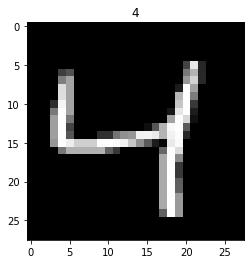

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [108]:
plt.imshow(training_data.data[2], cmap='gray')
plt.title('%i' % training_data.targets[2])
plt.show()
torch.set_printoptions(linewidth=200)
training_data.data[2]

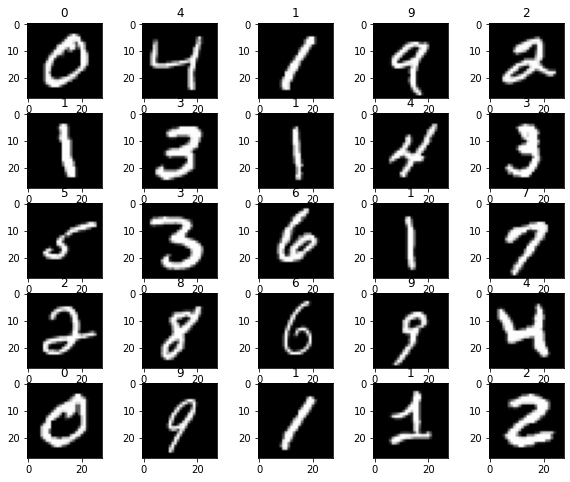

In [109]:
figure = plt.figure(figsize=(10, 8))
for i in range(1, 26):
  img, label = training_data[i]
  figure.add_subplot(5, 5, i)
  plt.title(label)
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [110]:
idxs = list(range(10000))
training_data_loader = torch.utils.data.DataLoader(training_data, 
                                          # batch_size=100, 
                                          batch_size=50, 
                                          # shuffle=True, 
                                          num_workers=1, 
                                          sampler=SubsetRandomSampler(idxs)
                                          )

val_idxs = list(range(10000))
validation_data_loader = torch.utils.data.DataLoader(validation_data, 
                                          # batch_size=100, 
                                          batch_size=50, 
                                          # shuffle=True, 
                                          num_workers=1,
                                          sampler=SubsetRandomSampler(idxs))

training_data_loader, validation_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7fe520bbbad0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe520bbb550>)

Дан давхрагатай үед:

In [111]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(28*28, 10)

  def forward(self, x):
    y_pred = self.linear(x)
    #y_pred = torch.sigmoid(y_pred)
    #y_pred = softmax(y_pred)
    return y_pred

In [112]:
model = MLP()
model

MLP(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [113]:
# # Загвараа сургая
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epoch = 100
losses = list()
corrects_history = list()

CEL = nn.CrossEntropyLoss()

for i in range(epoch):
  training_corrects = 0.0
  training_loss = 0.0

  for X, y in training_data_loader:
    X=X.view(X.shape[0], -1)

    y_pred = model.forward(X)
    
    S = CEL(y_pred, y)

    optimizer.zero_grad()
    S.backward()
    optimizer.step()

    losses.append(S.item())
    max_vals, max_idxs = torch.max(y_pred, 1)
    training_corrects += torch.sum(max_idxs == y.data)
    training_loss += S.item()

  epoch_loss = training_loss / len(training_data_loader)
  epoch_acc = training_corrects / len(training_data_loader)

  if i % 10 ==0:
    print("Epoch:", i+1)
    print("Training loss: {:4.4f}, training_acc: {:4.4f}".format(epoch_loss, epoch_acc))
    #print(i, S.item())
    #model.plot_model(X, y)

Epoch: 1
Training loss: 1.6089, training_acc: 34.2750
Epoch: 11
Training loss: 0.4606, training_acc: 44.3450
Epoch: 21
Training loss: 0.3845, training_acc: 45.0850
Epoch: 31
Training loss: 0.3503, training_acc: 45.4550
Epoch: 41
Training loss: 0.3294, training_acc: 45.7200
Epoch: 51
Training loss: 0.3146, training_acc: 45.9100
Epoch: 61
Training loss: 0.3033, training_acc: 46.0450
Epoch: 71
Training loss: 0.2942, training_acc: 46.1150
Epoch: 81
Training loss: 0.2867, training_acc: 46.2100
Epoch: 91
Training loss: 0.2803, training_acc: 46.3050


Давхар давхрагатай үед:

In [114]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(28*28, 512)
    self.linear2 = nn.Linear(512, 512)
    self.linear3 = nn.Linear(512, 10)

  def forward(self, x):
    x = self.linear1(x)
    x = F.relu(x)
    x = self.linear2(x)
    x = F.relu(x)
    x = self.linear3(x)
    return x

In [115]:
model = MLP()
model

MLP(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=10, bias=True)
)

In [116]:
# # Загвараа сургая
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epoch = 200
losses = list()
val_losses = list()

#corrects_history = list()

epoch_loss_history = list()
epoch_acc_history = list()
epoch_val_loss_history = list()
epoch_val_acc_history = list()

CEL = nn.CrossEntropyLoss()

for i in range(epoch):
  training_corrects = 0.0
  training_loss = 0.0
  
  val_corrects = 0.0
  val_loss = 0.0

  # Training 
  for X, y in training_data_loader:
    X=X.view(X.shape[0], -1)

    y_pred = model.forward(X)
    
    S = CEL(y_pred, y)

    optimizer.zero_grad()
    S.backward()
    optimizer.step()

    losses.append(S.item())
    max_vals, max_idxs = torch.max(y_pred, 1)
    training_corrects += torch.sum(max_idxs == y.data)
    training_loss += S.item()

  epoch_loss = training_loss / len(training_data_loader)
  epoch_acc = training_corrects / len(training_data_loader)

  epoch_loss_history.append(epoch_loss)
  epoch_acc_history.append(epoch_acc)



  #Validation
  for X, y in validation_data_loader:
    X=X.view(X.shape[0], -1)
    y_pred = model.forward(X)
    S = CEL(y_pred, y)

    val_losses.append(S.item())
    max_vals, max_idxs = torch.max(y_pred, 1)
    val_corrects += torch.sum(max_idxs == y.data)
    val_loss += S.item()

  epoch_val_loss = val_loss / len(validation_data_loader)
  epoch_val_acc = val_corrects / len(validation_data_loader)

  epoch_val_loss_history.append(epoch_val_loss)
  epoch_val_acc_history.append(epoch_val_acc)


  if i % 10 ==0:
    print("Epoch:", i+1)
    print("Training loss: {:4.4f}, training_acc: {:4.4f}".format(epoch_loss, epoch_acc))
    print("Validation loss: {:4.4f}, val_acc: {:4.4f}".format(epoch_val_loss, epoch_val_acc))

Epoch: 1
Training loss: 2.2462, training_acc: 21.6000
Validation loss: 2.1720, val_acc: 28.2800
Epoch: 11
Training loss: 0.3611, training_acc: 45.0900
Validation loss: 0.3682, val_acc: 44.8050
Epoch: 21
Training loss: 0.2669, training_acc: 46.2500
Validation loss: 0.3008, val_acc: 45.6750
Epoch: 31
Training loss: 0.2189, training_acc: 47.0050
Validation loss: 0.2714, val_acc: 46.1800
Epoch: 41
Training loss: 0.1813, training_acc: 47.4500
Validation loss: 0.2522, val_acc: 46.2400
Epoch: 51
Training loss: 0.1495, training_acc: 47.8250
Validation loss: 0.2302, val_acc: 46.6250
Epoch: 61
Training loss: 0.1230, training_acc: 48.3450
Validation loss: 0.2153, val_acc: 46.7650
Epoch: 71
Training loss: 0.1012, training_acc: 48.6950
Validation loss: 0.2051, val_acc: 46.9100
Epoch: 81
Training loss: 0.0836, training_acc: 48.9750
Validation loss: 0.1999, val_acc: 47.0650
Epoch: 91
Training loss: 0.0689, training_acc: 49.2200
Validation loss: 0.1917, val_acc: 47.1700
Epoch: 101
Training loss: 0.057

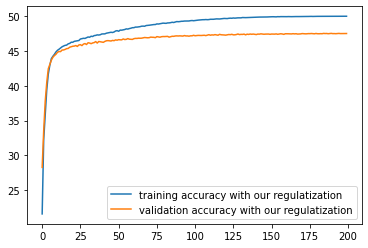

In [117]:
plt.plot(epoch_acc_history, label='training accuracy with our regulatization')
plt.plot(epoch_val_acc_history, label='validation accuracy with our regulatization')
plt.legend()

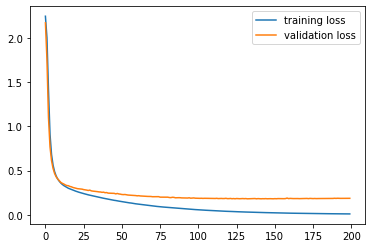

In [118]:
plt.plot(epoch_loss_history, label='training loss')
plt.plot(epoch_val_loss_history, label='validation loss')
plt.legend()

Regularization using Dropout

In [119]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(28*28, 512)
    self.linear2 = nn.Linear(512, 512)
    self.linear3 = nn.Linear(512, 10)
    self.dropout = nn.Dropout(0.4)

  def forward(self, x):
    x = self.linear1(x)
    x = F.relu(x)
    x = self.dropout(x)
    x = self.linear2(x)
    x = F.relu(x)
    x = self.dropout(x)
    x = self.linear3(x)
    return x

In [120]:
model = MLP()
model

MLP(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [121]:
# # Загвараа сургая
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epoch = 100
losses = list()
val_losses = list()

epoch_loss_history = list()
epoch_acc_history = list()
epoch_val_loss_history = list()
epoch_val_acc_history = list()

CEL = nn.CrossEntropyLoss()

for i in range(epoch):
  training_corrects = 0.0
  training_loss = 0.0
  
  val_corrects = 0.0
  val_loss = 0.0

  # Training 
  for X, y in training_data_loader:

    X=X.view(X.shape[0], -1)
    y_pred = model.forward(X)
    S = CEL(y_pred, y)
    optimizer.zero_grad()
    S.backward()
    optimizer.step()

    losses.append(S.item())
    max_vals, max_idxs = torch.max(y_pred, 1)
    training_corrects += torch.sum(max_idxs == y.data)
    training_loss += S.item()

  epoch_loss = training_loss / len(training_data_loader)
  epoch_acc = training_corrects / len(training_data_loader)

  epoch_loss_history.append(epoch_loss)
  epoch_acc_history.append(epoch_acc)

  #Validation
  for X, y in validation_data_loader:
    X=X.view(X.shape[0], -1)
    y_pred = model.forward(X)
    S = CEL(y_pred, y)

    val_losses.append(S.item())
    max_vals, max_idxs = torch.max(y_pred, 1)
    val_corrects += torch.sum(max_idxs == y.data)
    val_loss += S.item()

  epoch_val_loss = val_loss / len(validation_data_loader)
  epoch_val_acc = val_corrects / len(validation_data_loader)

  epoch_val_loss_history.append(epoch_val_loss)
  epoch_val_acc_history.append(epoch_val_acc)

  if i % 10 ==0:
    print("Epoch:", i+1)
    print("Training loss: {:4.4f}, training_acc: {:4.4f}".format(epoch_loss, epoch_acc))
    print("Validation loss: {:4.4f}, val_acc: {:4.4f}".format(epoch_val_loss, epoch_val_acc))

Epoch: 1
Training loss: 2.2597, training_acc: 12.8000
Validation loss: 2.2038, val_acc: 21.1800
Epoch: 11
Training loss: 0.4616, training_acc: 43.3650
Validation loss: 0.4738, val_acc: 43.1500
Epoch: 21
Training loss: 0.3304, training_acc: 45.3100
Validation loss: 0.3571, val_acc: 44.6600
Epoch: 31
Training loss: 0.2625, training_acc: 46.3450
Validation loss: 0.3067, val_acc: 45.5000
Epoch: 41
Training loss: 0.2119, training_acc: 46.9650
Validation loss: 0.2741, val_acc: 46.0400
Epoch: 51
Training loss: 0.1730, training_acc: 47.5900
Validation loss: 0.2483, val_acc: 46.1650
Epoch: 61
Training loss: 0.1471, training_acc: 47.8650
Validation loss: 0.2249, val_acc: 46.4900
Epoch: 71
Training loss: 0.1230, training_acc: 48.2300
Validation loss: 0.2152, val_acc: 46.6900
Epoch: 81
Training loss: 0.1041, training_acc: 48.5800
Validation loss: 0.2011, val_acc: 46.9350
Epoch: 91
Training loss: 0.0913, training_acc: 48.6750
Validation loss: 0.2028, val_acc: 46.8950


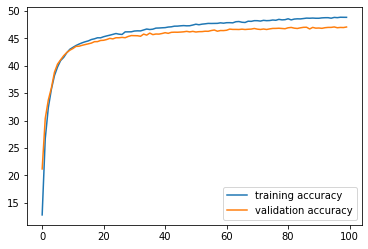

In [122]:
plt.plot(epoch_acc_history, label='training accuracy')
plt.plot(epoch_val_acc_history, label='validation accuracy')
plt.legend()

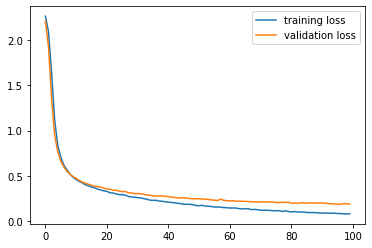

In [123]:
plt.plot(epoch_loss_history, label='training loss')
plt.plot(epoch_val_loss_history, label='validation loss')
plt.legend()